# Tensor Flow - A simple neural network

## Build a graph

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [4]:
rand_b = np.random.uniform(0,100,(5,1))

In [5]:
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [6]:
a = tf.placeholder(tf.float32)

In [7]:
b = tf.placeholder(tf.float32)

In [8]:
add_op = a+b

In [9]:
muk_op = a * b

In [11]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:10,b:rand_b})
    print(add_result)

[[ 109.43179321]
 [  62.06653976]
 [  67.87895203]
 [  83.48190308]
 [  64.19618225]]


## Example Neural Network

In [13]:
n_features = 10
n_dense_neurons = 3

In [14]:
x = tf.placeholder(tf.float32,(None,n_features))

In [15]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [16]:
xW = tf.matmul(x,W)

In [17]:
z = tf.add(xW,b)

In [18]:
a = tf.sigmoid(z)

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [21]:
print(layer_out)

[[ 0.19592889  0.84230143  0.36188066]]


## Simple Regression Example

In [22]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [23]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [24]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [25]:
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

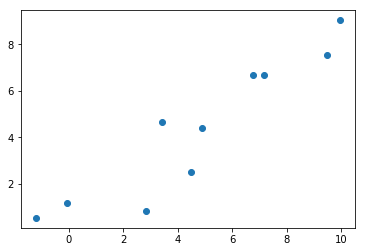

In [27]:
plt.plot(x_data,y_label,'o')

y = mx + b

In [28]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [41]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [42]:
error = 0

for x,y in zip(x_data,y_label):
    
    y_hat = m*x + b  #Our predicted value
    
    error += (y-y_hat)**2 # The cost we want to minimize (we'll need to use an optimization function for the minimization!)

In [43]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [44]:
init = tf.global_variables_initializer()

In [49]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 10000
    
    for i in range(epochs):
        
        sess.run(train)
        

    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

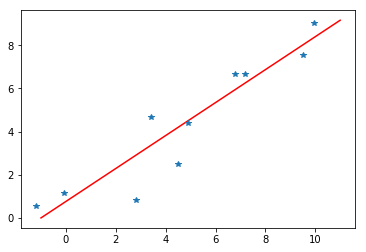

In [50]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')